# Predicting variation in EUR/USD exchange rate

First let's set the working directory and then load the data

In [40]:
import os
os.chdir("/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project/")
os.getcwd()

'/media/dftortosa/Windows/Users/dftor/Documents/diego_docs/industry/data_incubator/capstone_project'

In [41]:
import pandas as pd
import numpy as np
df_merged = pd.read_csv("results/sentiment_ecb_pricing.csv.gz", compression="gzip")
df_merged

,date,eur_usd_rate,previous_eur_pricing,percent_change_pricing,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,2008-10-31,1.2757,1.3035,-2.132720,1.27096,1.28405,1.407283,1.485861,1.279955,1.290642,...,0.0,0.0,0.000,0.114,0.25550,0.191,0.072733,94.262,1431,0.107776
1,2008-12-03,1.2623,1.2697,-0.582815,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,...,0.0,0.0,0.000,0.091,0.13800,0.265,0.080153,116.302,1569,0.111157
2,2008-12-09,1.2838,1.2854,-0.124475,1.27200,1.27467,1.324837,1.421761,1.276463,1.273948,...,0.0,0.0,0.000,0.130,0.18600,0.331,0.084775,133.097,1686,0.110935
3,2008-12-24,1.4005,1.3978,0.193161,1.41018,1.38323,1.311872,1.403607,1.397504,1.379089,...,0.0,0.0,0.000,0.112,0.16375,0.262,0.084757,137.730,1734,0.111465
4,2009-01-05,1.3582,1.3866,-2.048175,1.39466,1.40242,1.313537,1.395662,1.384276,1.384905,...,0.0,0.0,0.000,0.115,0.16900,0.286,0.085556,137.917,1721,0.112864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,2022-07-11,1.0098,1.0163,-0.639575,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070376,9372.642,133180,0.090424
3417,2022-07-12,1.0042,1.0098,-0.554565,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070420,9413.532,133677,0.090448
3418,2022-07-13,1.0067,1.0042,0.248954,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070487,9452.756,134107,0.090465
3419,2022-07-14,1.0005,1.0067,-0.615874,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,...,0.0,0.0,0.039,0.086,0.12100,0.199,0.070615,9507.609,134641,0.090546


In [42]:
df_merged.columns

Index(['date', 'eur_usd_rate', 'previous_eur_pricing',
       'percent_change_pricing', '5_days_rolling_mean_pricing',
       '10_days_rolling_mean_pricing', '60_days_rolling_mean_pricing',
       '120_days_rolling_mean_pricing', '5_days_exp_rolling_mean_pricing',
       '10_days_exp_rolling_mean_pricing', '60_days_exp_rolling_mean_pricing',
       '120_days_exp_rolling_mean_pricing', 'quantile_0.1_neg_sent',
       'quantile_0.25_neg_sent', 'quantile_0.35_neg_sent',
       'quantile_0.50_neg_sent', 'quantile_0.65_neg_sent',
       'quantile_0.75_neg_sent', 'quantile_0.9_neg_sent', 'mean_neg_sent',
       'sum_neg_sent', 'count_neg_sent', 'std_neg_sent',
       'quantile_0.1_10_days_moving_neg_sent',
       'quantile_0.25_10_days_moving_neg_sent',
       'quantile_0.35_10_days_moving_neg_sent',
       'quantile_0.50_10_days_moving_neg_sent',
       'quantile_0.65_10_days_moving_neg_sent',
       'quantile_0.75_10_days_moving_neg_sent',
       'quantile_0.9_10_days_moving_neg_sent', 'me

Subset the data selecting only predictors

In [43]:
predictors = df_merged.drop(["date", 
                             "eur_usd_rate", 
                             "percent_change_pricing", 
                             "previous_eur_pricing"], inplace=False, axis=1)
predictors

,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing,quantile_0.1_neg_sent,quantile_0.25_neg_sent,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,1.27096,1.28405,1.407283,1.485861,1.279955,1.290642,1.396575,1.446624,0.00,0.0,...,0.0,0.0,0.000,0.114,0.25550,0.191,0.072733,94.262,1431,0.107776
1,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,1.329658,1.390959,0.04,0.1,...,0.0,0.0,0.000,0.091,0.13800,0.265,0.080153,116.302,1569,0.111157
2,1.27200,1.27467,1.324837,1.421761,1.276463,1.273948,1.322807,1.383454,0.00,0.0,...,0.0,0.0,0.000,0.130,0.18600,0.331,0.084775,133.097,1686,0.110935
3,1.41018,1.38323,1.311872,1.403607,1.397504,1.379089,1.339918,1.382339,0.00,0.0,...,0.0,0.0,0.000,0.112,0.16375,0.262,0.084757,137.730,1734,0.111465
4,1.39466,1.40242,1.313537,1.395662,1.384276,1.384905,1.348158,1.383281,0.00,0.0,...,0.0,0.0,0.000,0.115,0.16900,0.286,0.085556,137.917,1721,0.112864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113,0.00,0.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070376,9372.642,133180,0.090424
3417,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875,0.00,0.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070420,9413.532,133677,0.090448
3418,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699,0.00,0.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070487,9452.756,134107,0.090465
3419,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439,0.00,0.0,...,0.0,0.0,0.039,0.086,0.12100,0.199,0.070615,9507.609,134641,0.090546


Now let's split the predictors between those related to EUR pricing and those of Twitter

In [44]:
predictors_eur_pricing = predictors[[column for column in predictors.columns if "rolling_mean_" in column]]
predictors_eur_pricing

,5_days_rolling_mean_pricing,10_days_rolling_mean_pricing,60_days_rolling_mean_pricing,120_days_rolling_mean_pricing,5_days_exp_rolling_mean_pricing,10_days_exp_rolling_mean_pricing,60_days_exp_rolling_mean_pricing,120_days_exp_rolling_mean_pricing
0,1.27096,1.28405,1.407283,1.485861,1.279955,1.290642,1.396575,1.446624
1,1.27110,1.27218,1.333905,1.431097,1.268733,1.270828,1.329658,1.390959
2,1.27200,1.27467,1.324837,1.421761,1.276463,1.273948,1.322807,1.383454
3,1.41018,1.38323,1.311872,1.403607,1.397504,1.379089,1.339918,1.382339
4,1.39466,1.40242,1.313537,1.395662,1.384276,1.384905,1.348158,1.383281
...,...,...,...,...,...,...,...,...
3416,1.01816,1.03253,1.055547,1.084537,1.019291,1.028329,1.057695,1.079113
3417,1.01320,1.02734,1.054278,1.083448,1.014261,1.023942,1.055941,1.077875
3418,1.01100,1.02284,1.053007,1.082417,1.011741,1.020807,1.054326,1.076699
3419,1.00750,1.01902,1.051537,1.081365,1.007994,1.017115,1.052562,1.075439


In [45]:
predictors_twitter = predictors[[column for column in predictors.columns if "rolling_mean_" not in column]]
predictors_twitter

,quantile_0.1_neg_sent,quantile_0.25_neg_sent,quantile_0.35_neg_sent,quantile_0.50_neg_sent,quantile_0.65_neg_sent,quantile_0.75_neg_sent,quantile_0.9_neg_sent,mean_neg_sent,sum_neg_sent,count_neg_sent,...,quantile_0.25_360_days_moving_neg_sent,quantile_0.35_360_days_moving_neg_sent,quantile_0.50_360_days_moving_neg_sent,quantile_0.65_360_days_moving_neg_sent,quantile_0.75_360_days_moving_neg_sent,quantile_0.9_360_days_moving_neg_sent,mean_360_days_moving_neg_sent,sum_360_days_moving_neg_sent,count_360_days_moving_neg_sent,std_360_days_moving_neg_sent
0,0.00,0.0,0.00000,0.0000,0.00000,0.0000,0.0000,0.000000,0.000,4.0,...,0.0,0.0,0.000,0.114,0.25550,0.191,0.072733,94.262,1431,0.107776
1,0.04,0.1,0.10040,0.1010,0.10640,0.1100,0.1712,0.104600,0.523,5.0,...,0.0,0.0,0.000,0.091,0.13800,0.265,0.080153,116.302,1569,0.111157
2,0.00,0.0,0.00000,0.0000,0.04100,0.1230,0.2715,0.090500,0.543,6.0,...,0.0,0.0,0.000,0.130,0.18600,0.331,0.084775,133.097,1686,0.110935
3,0.00,0.0,0.01155,0.1155,0.21945,0.2445,0.2688,0.129000,0.516,4.0,...,0.0,0.0,0.000,0.112,0.16375,0.262,0.084757,137.730,1734,0.111465
4,0.00,0.0,0.00000,0.0000,0.02850,0.2105,0.3053,0.095083,1.141,12.0,...,0.0,0.0,0.000,0.115,0.16900,0.286,0.085556,137.917,1721,0.112864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,0.00,0.0,0.00000,0.0550,0.09100,0.1290,0.2230,0.079722,22.402,281.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070376,9372.642,133180,0.090424
3417,0.00,0.0,0.00000,0.0695,0.11575,0.1480,0.2170,0.087720,47.018,536.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070420,9413.532,133677,0.090448
3418,0.00,0.0,0.00000,0.0465,0.09735,0.1240,0.2070,0.075525,50.904,674.0,...,0.0,0.0,0.038,0.086,0.12100,0.198,0.070487,9452.756,134107,0.090465
3419,0.00,0.0,0.00000,0.0580,0.10000,0.1320,0.2080,0.079810,47.008,589.0,...,0.0,0.0,0.039,0.086,0.12100,0.199,0.070615,9507.609,134641,0.090546


Now let's convert the response variable, which is the EUR/USD exchange rate, and the predictors to numpy arrays

In [55]:
y = df_merged["percent_change_pricing"].values
X = predictors #all predictors
X_eur_pricing = predictors_eur_pricing.values #eur pricing predictors
X_twitter = predictors_twitter.values #twitter sentiment predictors

In [47]:
print(y.shape)
print(X.shape)
print(X_eur_pricing.shape)
print(X_twitter.shape)

(3421,)
(3421, 85)
(3421, 8)
(3421, 77)


## Modeling with Random Forest

We are going to calculate the predictive power of the RF models using CV. Therefore, we first obtain training-evaluation splits

In [81]:
#create 5 training-evaluation splits
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.25, random_state=6383287)

First, check R2 if use as prediction just the previous value.. CHECK THIS

In [214]:
from sklearn import metrics 
metrics.r2_score(y, df_merged["previous_eur_pricing"])

-5.23676822235257

Then calculate R2 in the evaluation set of each partition considering the three different sets of predictors

In [59]:
#full model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_full_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the full model on 5 evaluation sets: {average_r2_full_model}"

'Average R2 of the full model on 5 evaluation sets: -0.13636954573766227'

In [58]:
#only eur pricing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
average_r2_eur_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X_eur_pricing, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the eur pricing-only model on 5 evaluation sets: {average_r2_eur_model}"

'Average R2 of the eur pricing-only model on 5 evaluation sets: -0.2010699727547472'

In [210]:
#only twitter
from sklearn.model_selection import cross_val_score, ShuffleSplit
average_r2_twitter_model = np.mean(cross_val_score(estimator=RandomForestRegressor(random_state=6383287), 
                                                X=X_twitter, 
                                                y=y, 
                                                cv=shuffle_split, 
                                                scoring="r2", 
                                                n_jobs=5))
f"Average R2 of the twitter-only model on 5 evaluation sets: {average_r2_twitter_model}"



'Average R2 of the twitter-only model on 5 evaluation sets: -8.524286925576385e-05'

Let's fit the models to the whole dataset and see predictor importance and predicted vs. observed

In [65]:
full_model = RandomForestRegressor(random_state=6383287)
eur_model = RandomForestRegressor(random_state=6383287)
twitter_model = RandomForestRegressor(random_state=6383287)

In [66]:
full_model.fit(X=X, y=y)
eur_model.fit(X=X_eur_pricing, y=y)
twitter_model.fit(X=X_twitter, y=y)

RandomForestRegressor(random_state=6383287)

In [67]:
full_model_pred = full_model.predict(X=X)
eur_model_pred = eur_model.predict(X=X_eur_pricing)
twitter_model_pred = twitter_model.predict(X=X_twitter)

<AxesSubplot:>

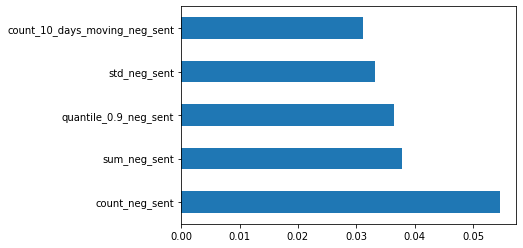

In [68]:
#full model
pd.Series(full_model.feature_importances_, index=predictors.columns).nlargest(5).plot(kind='barh')

<AxesSubplot:>

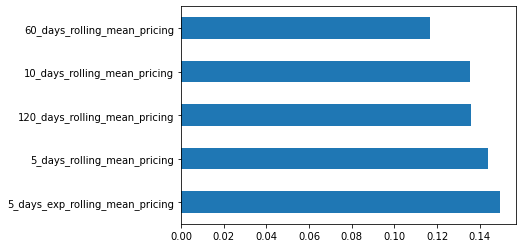

In [69]:
#eur pricing model only
pd.Series(eur_model.feature_importances_, index=predictors_eur_pricing.columns).nlargest(5).plot(kind='barh')

<AxesSubplot:>

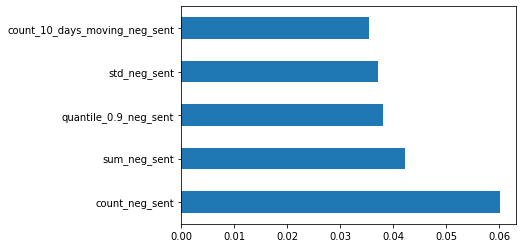

In [70]:
#twitter predictors only
pd.Series(twitter_model.feature_importances_, index=predictors_twitter.columns).nlargest(5).plot(kind='barh')

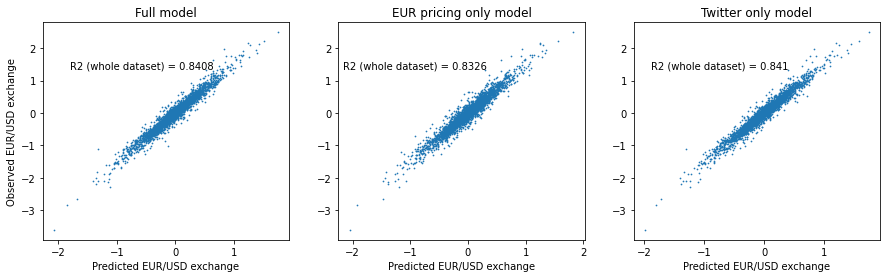

In [71]:
import matplotlib.pyplot as plt
from sklearn import metrics 

#open a plot with two panels
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

#plot scatter against date and eur pricing
ax1.scatter(x=full_model_pred, y=y, s=0.5)
ax2.scatter(x=eur_model_pred, y=y, s=0.5)
ax3.scatter(x=twitter_model_pred, y=y, s=0.5)

#set titles and axes labels
ax1.title.set_text("Full model")
ax1.set_ylabel("Observed EUR/USD exchange")
ax1.set_xlabel("Predicted EUR/USD exchange")
ax2.title.set_text("EUR pricing only model")
ax2.set_xlabel("Predicted EUR/USD exchange")
ax3.title.set_text("Twitter only model")
ax3.set_xlabel("Predicted EUR/USD exchange")


#add R2
ax1.text(0.40, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, full_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax2.text(1.51, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, eur_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
ax3.text(2.75, 0.8, 'R2 (whole dataset) = ' + str(np.round(metrics.r2_score(y, twitter_model_pred), 4)), horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

#close
plt.show()

The R2 values in the whole dataset are above 0.8, while in the evaluation dataseta are negative, it seems that there is overfitting and it could be caused by random forest, so we are going to optimize parameters. Calculating the change in price is a tougher problem, but it should not be so different between the whole dataset and evaluation datasets.

In [76]:
full_model_2 = RandomForestRegressor(random_state=6383287)
eur_model_2 = RandomForestRegressor(random_state=6383287)
twitter_model_2 = RandomForestRegressor(random_state=6383287)

In [212]:
##use gridsearch to optimize the parameters of the model
#make imports
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

##parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#make a dict with the parameters and values to be explored
    #https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#shuffle
shuffle_split_grid = ShuffleSplit(n_splits=3, test_size=0.25, random_state=6383287)
    #CHECK IN MORE DETAIL
    #This seems to be equivalent to: 
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        #But, it is usable for GridSearchCV
       #https://stackoverflow.com/questions/57672955/how-to-use-gridsearchcv-for-tuning-parameters-with-train-test-split-strategy


#prepare the gridsearch with the pipe across these parameter values using 3 cores
#search = GridSearchCV(twitter_model, params, n_jobs=-2, cv=shuffle_split_grid, scoring="r2")
search = RandomizedSearchCV(twitter_model, params, n_iter=20, cv=shuffle_split_grid, verbose=100, random_state=42, n_jobs=-2, scoring="r2")
    #we can use random search if we have many parameters, so the total number of combinations of all parameters
        #will be veery high
        #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    #for scoring options
        #sklearn.metrics.SCORERS.keys())
        
#make the search for out data
search.fit(X_twitter, y)

#print the best score with 3 decimals
print("Best parameter (CV score=%0.3f):" % search.best_score_)

#print the best value of the hyperparameter
print(search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameter (CV score=-0.042):
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [213]:
search.cv_results_

{'mean_fit_time': array([  3.59586318,  18.67073401, 290.21490057,  30.1193037 ,
        556.72681173,  18.14782095, 981.83149529,   2.82246987,
        254.5312887 , 474.04540793, 132.07625564,  29.09145657,
         28.73645457,  58.70029624,  68.1570398 , 511.19356624,
         25.90761431, 164.48155085, 575.29435587, 297.28621459]),
 'std_fit_time': array([ 0.39065444,  2.56255555,  8.23523576,  1.1622362 , 31.78065441,
         3.32494643, 44.87555461,  0.13089031,  7.47005912, 13.30549566,
         0.99370852,  0.19071284,  0.39132922,  1.00875039,  3.53075678,
        30.4061039 ,  0.18898798,  1.13689793, 14.83050813, 13.12582977]),
 'mean_score_time': array([0.04718486, 0.14725025, 0.25115856, 0.37747105, 0.34497396,
        0.13148204, 0.65540902, 0.04109852, 0.35841028, 0.65248704,
        0.10830768, 0.20637528, 0.33653808, 0.40389864, 0.51257857,
        0.24846403, 0.29247554, 0.22630699, 0.27727   , 0.33932455]),
 'std_score_time': array([0.00026551, 0.01742087, 0.032578

## Modeling with Supporting Vector Machines

In [18]:
from sklearn.svm import SVR
from sklearn import metrics
print(metrics.r2_score(y, SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_twitter, y=y).predict(X=X_twitter)))
#print(metrics.r2_score(y, SVR(kernel="linear", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_twitter, y=y).predict(X=X_twitter)))
#metrics.r2_score(y, SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1).fit(X_twitter, y=y).predict(X=X_twitter))
    #https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

0.5980398908677254


## Modeling with Neural networks

In [88]:
## set the seed to get the same results when randomly splitting the dataset in training, test and evaluation
#general random seed
from numpy.random import seed #for general random seed
seed(10)

#tensorflow-specific seed. If you want to know why we need to set two separate random seeds see
    #https://blog.cmgresearch.com/2020/09/04/tensorflow-has-to-random-seeds.html
import tensorflow
tensorflow.random.set_seed(10)

In [91]:
##split in training and test

#We will split the data into training and test sets. We will perform a 5-fold crossvalidation in the training test, meaning we will split the data in 5 folds, being each time one of them used for evaluation and the other 5 for training. We will do this for each combination of hyperparameters to be tested. Then the final model (that maximizing the evaluation metric used) will be TESTED in the testing dataset. This last dataset was nos used to fine tune the model, so it is independent in some degree, although it is not entirely independent as it comes from the same original dataset.
    #https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

#split into training (80%) and test (20%)
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(X, y, test_size=0.20)

#according to the professors of the course we cannot calculate correlation when you have
#small data and hence you have to do cross validation (you cannot just split in training 
#and evaluation one time). Maybe it is because you have small dataset, and you are making 
#it even smaller? so you cannot calculate a correlation? I am not sure about this, but I am 
#going to do the cross validation to fine tune the hyperparameters, and then whit the whole 
#training dataset + test we are going to calculate correlation between observed and predicted, 
#we have a good sample size.
    #"In very small dataset you may be forced to do "leave one out" crossvalidation. 
    #For N samples you cycle selecting one sample for predictions (this would be your validation set) 
    #and keeping N-1 for training. Unfortunately in this case you cannot compute correlations (can you 
    #guess why?) and must use error-related metrics like Mean Squared Error"

#see the shapes
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(2736, 2)
(685, 2)
(2736,)
(685,)


In [140]:
from keras.layers import Dense, BatchNormalization, Dropout #for creating dense NNs and do layer normalization and dropout

##Define a function to run NNs with different architectures
def build_model(n_layers, n_units, input_shape, act_function):

    #declaring a local model. This is going to be a sequential NN, made of Dense layers (i.e., all nodes connected)
    m = Sequential()
    
    #a loop that goes l=0, l=1, l=2, ..., l=(n_layers-1)
    for l in range(n_layers):
        #are we doing the first layer? if yes the declaration has an extra parameter for the input shape (the number of predictors)
        if l == 0:
            m.add(Dense(units=n_units, activation=act_function, input_shape=input_shape))
        else: #if not
            #and it is the first of third layer
            if l == 1 or l == 3:
                #in case you want to add normalization and dropout
                #NOW ANNOTATED, I have not studies this in detail
                    #https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
                    #https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/
                    #there should be slides of the course about this.
    
                #we add the layer and a normalization layer and dropout
                m.add(Dense(units=n_units, activation=act_function))
                m.add(BatchNormalization(momentum=0.5))
                m.add(Dropout(0.5))
            else:
                m.add(Dense(units=n_units, activation=act_function))
    
    #adding the output layer
    m.add(Dense(1, activation='linear'))
    
    #returning the declared model
    return(m)

In [146]:
##explore different hyperparameter combinations

#we want to study the combination of these parameters
layers_list = [1, 3, 6, 9]
units_list = [16, 64, 128, 240, 300, 325, 360]

#empty vectors for saving checks
check_1 = []
check_2 = []

#room to store all the training histories
all_histories = {}

#set the fixed hypeparameters, that is, those we are not going test
num_epochs = 50
n_splits = 5
act_function = 'tanh'
optimizer_used ='rmsprop'
loss_used = 'mean_squared_error'

In [123]:
#set the learning rate
#tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001)
    #default is 0.001
    #https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

from sklearn.model_selection import KFold #for making k fold splits of the data
    
#for each layer number
for j in range(0, len(layers_list)):

    #select the [j] layer number
    selected_layer_number = layers_list[j]
    
    #room to store all the training histories of the [j] number of layers
    all_histories[selected_layer_number] = {}
    
    #for each number of units
    for k in range(0, len(units_list)):
    
        #select the [k] number of units
        selected_number_units = units_list[k]
    
        #room to store all the training histories of the [k] number of units
        all_histories[selected_layer_number][selected_number_units] = {}
    
        #print the selected combination
        print('Layers: ' + str(selected_layer_number) + ' units:', str(selected_number_units))
    
        #getting the model
        m = build_model(n_layers=selected_layer_number, n_units=selected_number_units, input_shape=(features_train.shape[1],), act_function=act_function)
            #Keras wants the data shape as a tuple. In case of images is something like (image width, image height, number of channels). In our case data is tabular so each data point is an array (a row in the table) and we just need to specify a single number, i.e. the number of columns. However, we still need to input a tuple, so...
            #there are warnings related to cuda, EXPLORE IN THE FUTURE
                #https://stackoverflow.com/questions/41890549/tensorflow-cannot-open-libcuda-so-1
    
        #compiling
        m.compile(optimizer=optimizer_used, loss=loss_used, metrics=[tensorflow.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None), tensorflow.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)])
            #https://keras.io/api/metrics/regression_metrics/
        
        #a counter for the folds, useful for keeping track of what's going on
        f = 0
    
        #we are going to do the K-fold cross validation
        #https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6
    
        #declaring the splitter 
        kf = KFold(n_splits=n_splits, shuffle=False)
            #K-Folds cross-validator
            #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
            #Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
                #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
    
        #note that we can use split as part of a loop
        #in each iteration, the rows (genes) are split in 5 folds, 4 are used to training (11256) and 1 for evaluation (2814; numbers for yoruba 1000kb). You can see how the evaluation dataset changes in each iteration.
        if False:
            for train_index_cv, val_index_cv in kf.split(features_train, target_train):
                print('TRAINING (', len(train_index_cv), '):', train_index_cv, 'EVALUATION (', len(val_index_cv), '): ', val_index_cv)
    
        #but we can also generate the splits and run loop on them manually
        #generate the indexes of the 5 splits
        indexes_cv = []
        indexes_cv = list(kf.split(features_train, target_train))
            #https://stackoverflow.com/questions/62229622/kfold-unpacks-the-number-of-splits-into-the-same-number-of-variables-instead-of
    
        #for each split
        for l in range(0, len(indexes_cv)):
            
            #select the [l] split
            selected_split = indexes_cv[l]
    
            #select the indexed for training and evaluation
            train_index_cv = selected_split[0]
            val_index_cv = selected_split[1]
    
            #check that the size is ok
            check_1.append(len(train_index_cv) + len(val_index_cv) == len(features_train) & len(train_index_cv) + len(val_index_cv) == len(target_train))
            check_2.append(len(train_index_cv) > len(val_index_cv))
    
            #informing the user
            f += 1
            print('- fold: ' + str(f)) #I guess we add zero because python starts at 0
    
            #extracting the data for this fold
            features_train_cv = features_train[train_index_cv, :]
            features_val_cv   = features_train[val_index_cv, :]
            target_train_cv   = target_train[train_index_cv]
            target_val_cv     = target_train[val_index_cv]
                #as in pandas.data.frame, you can select rows in a numpy.array using [,], left for row.
    
            #fitting
            all_histories[selected_layer_number][selected_number_units][f] = m.fit(
                features_train_cv, target_train_cv, 
                epochs=num_epochs, 
                validation_data=(features_val_cv, target_val_cv), verbose=0)
                #you can change verbose to 1 if you want to see the output of the model
    
#check there is no False in the checks
print(False not in check_1)
print(False not in check_2)


Layers: 1 units: 16
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 1 units: 64
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 1 units: 128
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 3 units: 16
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 3 units: 64
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 3 units: 128
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 6 units: 16
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 6 units: 64
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
Layers: 6 units: 128
- fold: 1
- fold: 2
- fold: 3
- fold: 4
- fold: 5
True
True


In [124]:
##extract the last value of evaluation metrics for the last epoch in the evaluation dataset of each folder in each architecture

#empty vector to save results as rows. As many rows as folder we have for each combination of number of layers and units
rows = []

#for folder we have, i.e., for each split
for j in range(1, n_splits+1): #we need a range of values starting at 1, because folders are names as 1, 2, 3, 4 and 5

    #select the [j] folder
    selected_folder = j
    
    #for each number of units
    for k in range(0, len(units_list)):

        #select the [k] number of units
        selected_number_units = units_list[k]

        #for each number of layers
        for l in (range(0, len(layers_list))): #we end the loop with the first variable in the original loop used to create all_histories, that is, number of layers. This is needed if you want to use "all_histories.keys()", which has the values of the first variable used to store data in all_histories.

            #select the [l] number of layers
            selected_layer_number = layers_list[l]

            #open the row
            row = []

            #save the combination of number of units and layers. We will have the same combination repeated several times
            row.append('_'.join([str(selected_layer_number), str(selected_number_units)]))

            #add the folder
            row.append(selected_folder)

            #add the LAST value of the three metrics
            row.append(all_histories[selected_layer_number][selected_number_units][selected_folder].history['val_loss'][-1])
            row.append(all_histories[selected_layer_number][selected_number_units][selected_folder].history['val_mean_absolute_error'][-1])
            row.append(all_histories[selected_layer_number][selected_number_units][selected_folder].history['val_root_mean_squared_error'][-1])

            #add the row the final dataset
            rows.append(row)

#converting to pandas
df = pd.DataFrame(rows, columns=["n_layers_n_units", "fold", "loss", "mae", "rmse"])

#average over folds
df = df.groupby(df['n_layers_n_units']).aggregate('mean')

#and take a look to the numbers
print(df)

                  fold      loss       mae      rmse
n_layers_n_units                                    
1_128                3  0.301149  0.407380  0.548586
1_16                 3  0.300277  0.406846  0.547791
1_64                 3  0.300653  0.406935  0.548121
3_128                3  0.298374  0.405073  0.546030
3_16                 3  0.299230  0.405658  0.546806
3_64                 3  0.298500  0.405234  0.546141
6_128                3  0.298147  0.404979  0.545830
6_16                 3  0.298343  0.405062  0.546001
6_64                 3  0.298243  0.405029  0.545913


In [125]:
#selecting architecture with best loss
arch_selected = df.loc[:, 'loss'].idxmin()
final_layer_number = arch_selected.split('_')[0]
final_unit_number = arch_selected.split('_')[1]
print('Best performance for is shown with ' + str(final_layer_number) + ' layers and ' + str(final_unit_number) + ' units')

Best performance for is shown with 6 layers and 128 units


In [147]:
##Run the final model using the whole dataset (training and test)
#build the final model 
final_model = build_model(n_layers=int(final_layer_number), n_units=int(final_unit_number), input_shape=(features_train.shape[1],), act_function=act_function)
    #Keras wants the data shape as a tuple. In case of images is something like (image width, image height, number of channels). In our case data is tabular so each data point is an array (a row in the table) and we just need to specify a single number, i.e. the number of columns. However, we still need to input a tuple, so...

#compile the model
final_model.compile(optimizer=optimizer_used, loss=loss_used, metrics=[tensorflow.keras.metrics.MeanAbsoluteError(name="mean_absolute_error", dtype=None), tensorflow.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error", dtype=None)])

#run the model
history = final_model.fit(
    features_train, target_train, 
    epochs=num_epochs, 
    validation_data=(features_test, target_test), verbose=0)

In [148]:
#use the final model to predict in the test dataset
predictions = final_model.predict(features_test)
print(predictions.shape)

(685, 1)


In [149]:
from sklearn.metrics import r2_score
#calculate the correlation between predicted and observed on the test dataset
#changing format to pandas Series, for handiness
y_pred = pd.Series(predictions[:,0])
y = pd.Series(target_test)
#computing correlation
accuracy = y.corr(y_pred, method='spearman')
print("accuracy (measured as Spearman's correlation) is: ", accuracy)
print("R2", r2_score(y, y_pred))

accuracy (measured as Spearman's correlation) is:  0.008610441088749735
R2 -0.059351179612471716


In [150]:
#define a function to plot the metrics
def plot_loss_history(h, metric, title):
    plt.plot(h.history[metric], label = "Train " + metric)
    plt.plot(h.history['val_' + metric], label = "Validation " + metric)
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

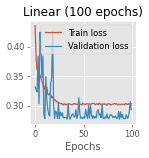

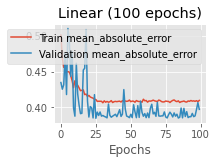

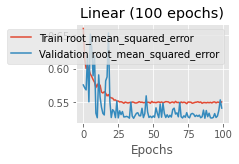

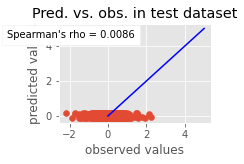

In [151]:
#plot the four metrics
#open the plot
plt.figure(figsize=(5,5), dpi=60) # 10 is width, 4 is height
#loss panel
plt.subplot(2,2,1)
plot_loss_history(history, metric='loss', title='Linear ({} epochs)'.format(num_epochs))
#mae panel
plt.subplot(2,2,2)
plot_loss_history(history, metric='mean_absolute_error', title='Linear ({} epochs)'.format(num_epochs))
#rmsq panel
plt.subplot(2,2,3)
plot_loss_history(history, metric='root_mean_squared_error', title='Linear ({} epochs)'.format(num_epochs))
#predicted vs observed panel
plt.subplot(2,2,4)
plt.scatter(y, y_pred) #equivalent: plt.plot(y, y_pred, "o")
plt.plot([0, 5], [0, 5], color='b') #draw the main diagonal, for reference
plt.xlabel("observed values") #labelling the axis
plt.ylabel("predicted values")
plt.title("Pred. vs. obs. in test dataset") #title
plt.text(.50,.94,"Spearman's rho = {}".format(round(accuracy, 4)), bbox={'facecolor':'w','pad':5}, ha="right", va="top", transform=plt.gca().transAxes) #title
    #bbox_inches='tight' is used to reduce the margins
        #https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
#close the plot
plt.show()

In [136]:
#Calculate different metrics to evaluate
from sklearn.metrics import mean_absolute_error as mae #for calculating mean absolute error

print("Pearson's correlation test  : " + str(y.corr(y_pred, method='pearson')))
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
print("Spearman's correlation test : " + str(y.corr(y_pred, method='spearman')))
print('Root Mean Square Error      : ' + str(np.sqrt(sum((y-y_pred)**2)/len(y))))
print('Mean Absolute Error         : ' + str(mae(y, y_pred)))
print('Target mean                 : ' + str(y.mean()))
print('Predictions mean            : ' + str(y_pred.mean()))
    #more: https://keras.io/api/metrics/regression_metrics/


Pearson's correlation test  : 0.0044088748423036055
Spearman's correlation test : 0.032496860971212814
Root Mean Square Error      : 0.5448483468839544
Mean Absolute Error         : 0.4021824231799952
Target mean                 : 0.01619591492900875
Predictions mean            : 0.15822726


In [137]:
##Extract the weights of the first layer as a first approximation to feature importance

#extracting weights and biases from the first layer
first_layer_weights = final_model.layers[0].get_weights()[0]
first_layer_biases = final_model.layers[0].get_weights()[1]

#taking a look at the shape of the weights matrix
print(first_layer_weights.shape) #each feature (16 rows) has a weight for each node (16 columns)
    #In the example of the DL course, they got 13 rows, and they had 13 features. While the number of columns was equal to the number of nodes in the first layer. Then, they transposed and show the result.

#we are interested in absolute values of the weights since a -15 is way more important than a +0.1
first_layer_weights = np.absolute(first_layer_weights)

#It's handy to have a pandas dataframe for data exploration and description
w = pd.DataFrame(first_layer_weights)

#it's also better to have features as columns and nodes as rows, since many statistics are available out of the box on a by-column basis
w = w.transpose()
print(w)

#summary statistics per column (feature)
summary_statistics = w.describe()

#see the average across all 16 feature
summary_statistics.iloc[1] 
#header[1:len(header)] #predictor names in order from the source
	
#Results:
	#recombination rate (third) does not have the greatest weight, which does not make sense. It would be better to have a way to integrate the weights of a feature across layers..

(2, 360)
            0         1
0    0.092491  0.071381
1    0.089529  0.023271
2    0.010059  0.129017
3    0.063648  0.054853
4    0.045845  0.048223
..        ...       ...
355  0.003522  0.028538
356  0.067362  0.080799
357  0.098071  0.004790
358  0.120307  0.042085
359  0.036335  0.066550

[360 rows x 2 columns]


NameError: name 'header' is not defined

### Notes about current state

- After the presentation I did, I have compared the null model with only pricing data and the twitter augmented model using cross validation. Basically, I have made 5 splits of the data in and calculated the mean R2 in the evaluation dataset. Using this approach, the Twitter is still much better than the null model (1-5%), but the problem is that the R2 values are negative in both models when predicting in the evaluation datasets! Twitter improves, but the models are very bad! R2 is around 0.83 when predicting in the whole dataset. Maybe there is overfitting, but I have reduced the predictors selecting those with more importance, and I get similar results. This was predicting the change of the Euro value in percentage and I have used linear models, random forest, decision trees, supporting vector machines and neural networks testing different parameters.

- So I have come back to the prediction of just the eur pricing. Here, using cross validation I found that the Twitter model as good as the null model. One problem I see with this approach is that the null model is almost perfect, with an R2 of 0.995 0.998. So I decided to check what happens using just twitter sentiment. 

- A model using the sentiment of twitter (including a moving calculation of mean, median, etc..) get an R2 of 0.99 also!! maybe 0.993 or 0.994 using cross validation!! To me this is a very interesting result. Yes, I have not surpassed the pricing model, but I am there just using Twitter! One could say that chanages in pricing influence the sentiment of twitter, so the pricing is already there, but it is too high R2 for a predictor that does not include the actual pricing values of the previous days. 

- In addition, what would happen in a situation of uncertainty? Maybe there twitter is faster, and dected changes in the expectations of economic agents before an actual change in the pricing. Also, what about other currencies that are less stable? maybe twitter sentiment can surpass previous pricing in these scenarios. 

- I think a company could use my approach on searching for topics relevant for the price of a currency and use them in machine learning framework to improve their currency predictions. Do you think this is good enough for the capstone?

- Comments Robert
    - check data leak
        - shuffle columns and see if the model still behaves well
    - use cross validation with temporal data can mix data? but I have in each row the value of the corresponding previous days
    - min_sample leaf (2,200,), min split
    - null model using just the exact previous value as prediction?


### Next steps

- check moving averages
    - check that no eur pricing data is used in these calculations!!!
    - they consider the current day euro and sentiment value?
- read:
    - The predictive power of public Twitter sentiment for forecasting cryptocurrency prices
        - INTERESTING APPROACH TO CLEAN TWEETS AND THEN APPLY VADER
        - https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e
- Extend to other currencies?